In [154]:
import pandas as pd
import numpy as np

# Movielens Case Study

Project 2 

DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings
Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp

Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
UserIDs range between 1 and 6040 
The MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
A timestamp is represented in seconds since the epoch is returned by time(2)
Each user has at least 20 ratings
 

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code

Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

Gender is denoted by an "M" for male and "F" for female
Age is chosen from the following ranges:
 

Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"
 

Occupation is chosen from the following choices:
Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”

Movies.dat
Format - MovieID::Title::Genres

Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 

 Titles are identical to titles provided by the IMDB (including year of release)
 

Genres are pipe-separated and are selected from the following genres:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
Movies are mostly entered by hand, so errors and inconsistencies may exist


In [155]:
names_col_1=['UserID','MovieID','Rating','Timestamp']
names_col_2=['UserID','Gender','Age','Occupation','Zip-code']
names_col_3=['MovieID','Title','Genres']

In [156]:
df1=pd.read_csv('ratings.dat',header=None,sep='::',names=names_col_1)
df2=pd.read_csv('users.dat',header=None,sep='::',names=names_col_2)
df3=pd.read_csv('movies.dat',header=None,sep='::',names=names_col_3)

<ipython-input-156-11a411afa0e9>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1=pd.read_csv('ratings.dat',header=None,sep='::',names=names_col_1)
<ipython-input-156-11a411afa0e9>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2=pd.read_csv('users.dat',header=None,sep='::',names=names_col_2)
<ipython-input-156-11a411afa0e9>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3=pd.read_csv('movies.dat',he

In [157]:
df1.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [158]:
df2.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [159]:
df3.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [160]:
df1.shape

(1000209, 4)

In [161]:
df2.shape

(6040, 5)

In [162]:
df3.shape

(3883, 3)

In [163]:
df1.nunique()

UserID         6040
MovieID        3706
Rating            5
Timestamp    458455
dtype: int64

In [164]:
df2.nunique()

UserID        6040
Gender           2
Age              7
Occupation      21
Zip-code      3439
dtype: int64

In [165]:
df3.nunique()

MovieID    3883
Title      3883
Genres      301
dtype: int64

In [166]:
df4=pd.merge(df1,df3,on='MovieID')
df4.shape

(1000209, 6)

In [167]:
Master_data_frame=pd.merge(df4, df2, on="UserID")
Master_data_frame.shape

(1000209, 10)

In [168]:
Master_data_frame.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [169]:
Master_data=Master_data_frame[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
Master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


In [170]:
Master_data.nunique()

MovieID       3706
Title         3706
UserID        6040
Age              7
Gender           2
Occupation      21
Rating           5
dtype: int64

In [171]:
Master_data.shape

(1000209, 7)

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

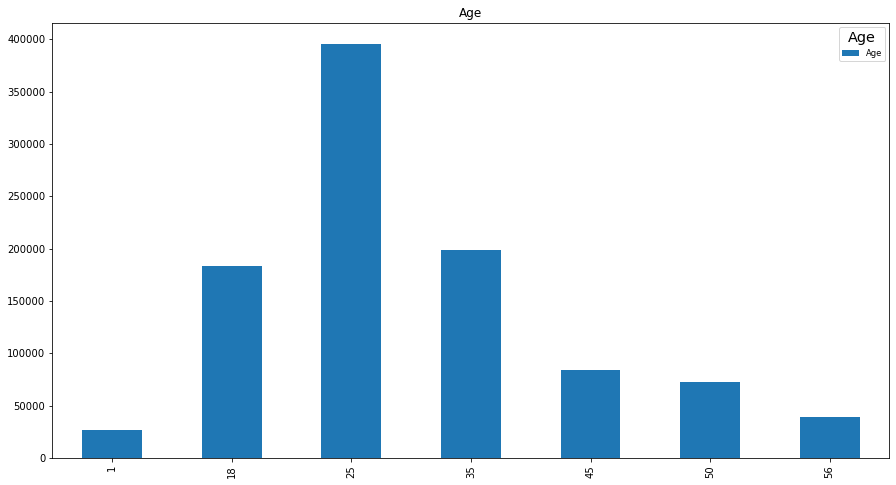

In [173]:
plt.figure(figsize=(15,8))
# labels=["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
Master_data['Age'].value_counts().sort_index().plot(kind='bar')
plt.legend(loc='upper right',fontsize ='small',title='Age',title_fontsize='x-large')
plt.title('Age')
plt.show()

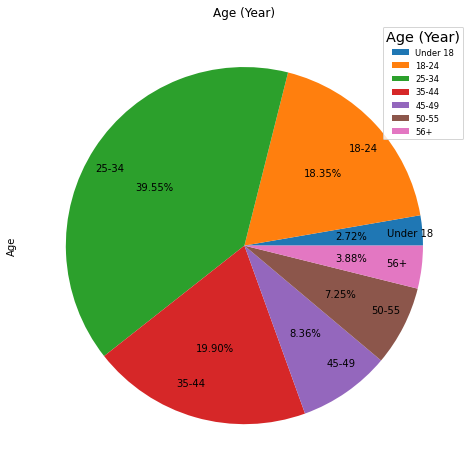

In [174]:
plt.figure(figsize=(8,10))
labels=["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
Master_data['Age'].value_counts().sort_index().plot(kind='pie',autopct='%.2f%%',labels=labels,labeldistance=.8)
plt.legend(loc='upper right',fontsize ='small',title='Age (Year)',title_fontsize='x-large')
plt.title('Age (Year)')
plt.show()

In [175]:
TS_df = Master_data_frame.loc[Master_data_frame['Title'].str.contains("Toy Story", case=False)]
TS_df.nunique()

UserID        2546
MovieID          2
Rating           5
Timestamp     3431
Title            2
Genres           1
Gender           2
Age              7
Occupation      21
Zip-code      1820
dtype: int64

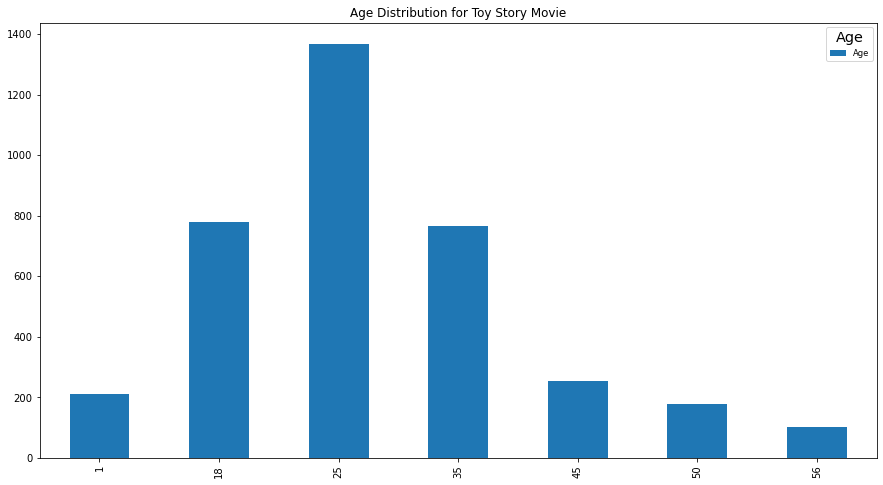

In [176]:
plt.figure(figsize=(15,8))
# labels=["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
TS_df['Age'].value_counts().sort_index().plot(kind='bar')
plt.legend(loc='upper right',fontsize ='small',title='Age',title_fontsize='x-large')
plt.title('Age Distribution for Toy Story Movie')
plt.show()

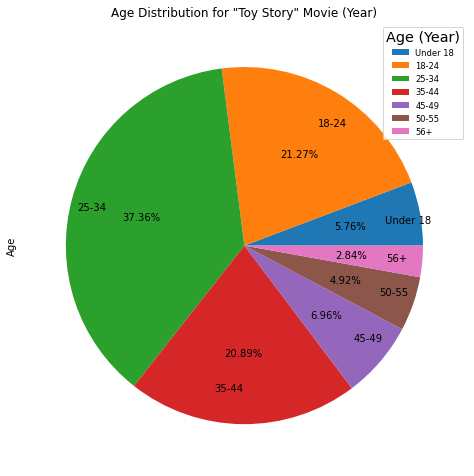

In [177]:
plt.figure(figsize=(8,10))
labels=["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
TS_df['Age'].value_counts().sort_index().plot(kind='pie',autopct='%.2f%%',labels=labels,labeldistance=.8)
plt.legend(loc='upper right',fontsize ='small',title='Age (Year)',title_fontsize='x-large')
plt.title('Age Distribution for "Toy Story" Movie (Year)')
plt.show()

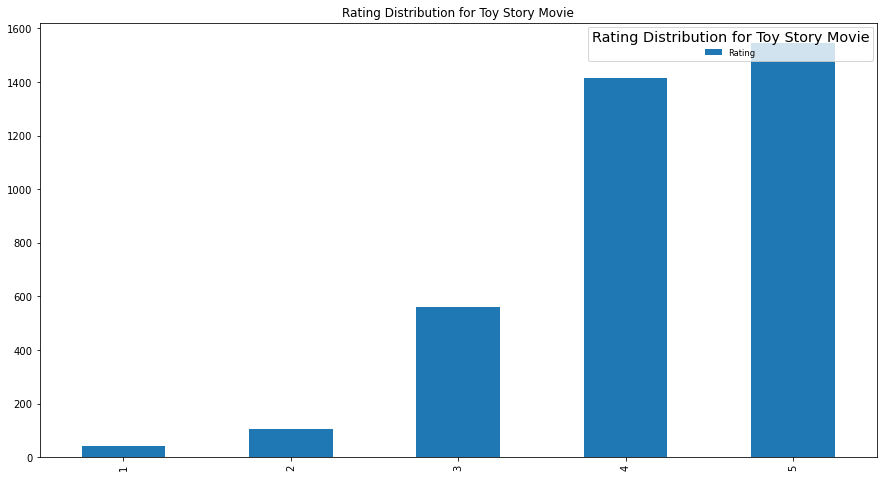

In [178]:
plt.figure(figsize=(15,8))
# labels=["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
TS_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.legend(loc='upper right',fontsize ='small',title='Rating Distribution for Toy Story Movie',title_fontsize='x-large')
plt.title('Rating Distribution for Toy Story Movie')
plt.show()

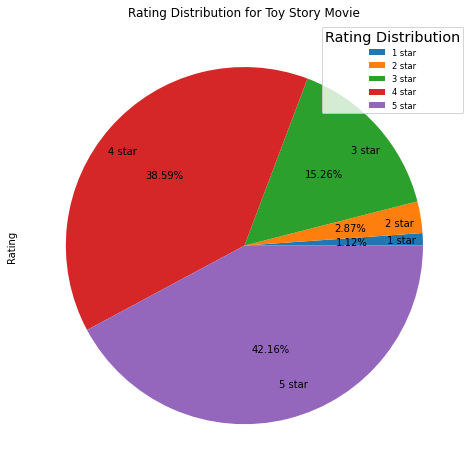

In [179]:
plt.figure(figsize=(8,10))
labels=["1 star","2 star","3 star","4 star","5 star"]
TS_df['Rating'].value_counts().sort_index().plot(kind='pie',autopct='%.2f%%',labels=labels,labeldistance=.8)
plt.legend(loc='upper right',fontsize ='small',title='Rating Distribution',title_fontsize='x-large')
plt.title('Rating Distribution for Toy Story Movie')
plt.show()

In [180]:
Master_data.shape

(1000209, 7)

In [181]:
Master_data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

In [182]:
Master_data.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [183]:
Ratings = pd.DataFrame(Master_data.groupby('Title')['Rating'].mean())
Ratings.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [184]:
Ratings['Number of Ratings'] = pd.DataFrame(Master_data.groupby('Title')['Rating'].count())
Ratings.head()

,Rating,Number of Ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


<AxesSubplot:>

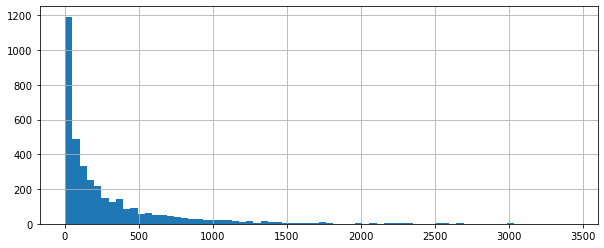

In [185]:
plt.figure(figsize=(10,4))
Ratings['Number of Ratings'].hist(bins=70)

<AxesSubplot:>

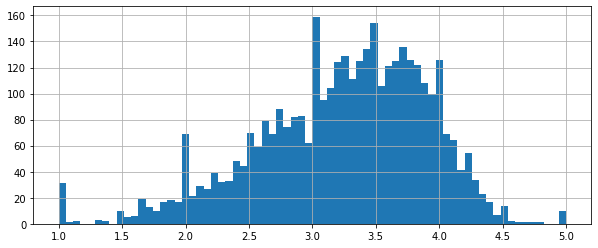

In [186]:
plt.figure(figsize=(10,4))
Ratings['Rating'].hist(bins=70)

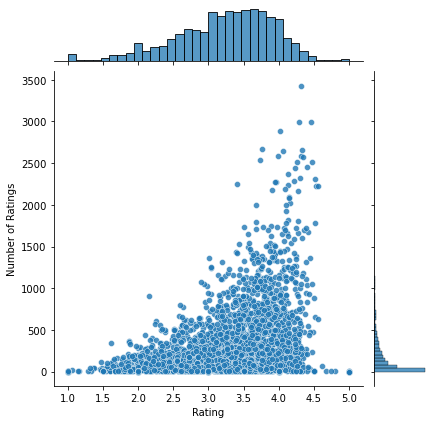

In [187]:
sns.jointplot(x='Rating',y='Number of Ratings',data=Ratings,alpha=0.8)

In [188]:
Ratings.sort_values('Number of Ratings',ascending=False).head(25)

,Rating,Number of Ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


In [189]:
# Separting movie title and year part using split function.
split_values = Master_data_frame['Title'].str.split("(",expand=True)

In [190]:
split_values

,0,1,2,3
0,One Flew Over the Cuckoo's Nest,1975),None,None
1,James and the Giant Peach,1996),None,None
2,My Fair Lady,1964),None,None
3,Erin Brockovich,2000),None,None
4,"Bug's Life, A",1998),None,None
...,...,...,...,...
1000204,Footloose,1984),None,None
1000205,MacKenna's Gold,1969),None,None
1000206,Pumpkinhead,1988),None,None
1000207,Missing in Action,1984),None,None


In [191]:
# setting 'movie_title' values to title part.
Master_data_frame['movie_title'] = split_values[0]

In [192]:
# creating 'release_year' column.
Master_data_frame['release_year'] = Master_data_frame['Title'].str.slice(-5)

In [193]:
# Cleaning the release_year series.
Master_data_frame['release_year'] = Master_data_frame.release_year.str.replace(')','')

In [194]:
Master_data_frame=Master_data_frame.drop(['Title'], axis = 1)

In [195]:
Master_data_frame

,UserID,MovieID,Rating,Timestamp,Genres,Gender,Age,Occupation,Zip-code,movie_title,release_year
0,1,1193,5,978300760,Drama,F,1,10,48067,One Flew Over the Cuckoo's Nest,1975
1,1,661,3,978302109,Animation|Children's|Musical,F,1,10,48067,James and the Giant Peach,1996
2,1,914,3,978301968,Musical|Romance,F,1,10,48067,My Fair Lady,1964
3,1,3408,4,978300275,Drama,F,1,10,48067,Erin Brockovich,2000
4,1,2355,5,978824291,Animation|Children's|Comedy,F,1,10,48067,"Bug's Life, A",1998
...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Drama,M,45,5,77662,Footloose,1984
1000205,4211,3806,3,965319138,Western,M,45,5,77662,MacKenna's Gold,1969
1000206,4211,3840,4,965319197,Horror,M,45,5,77662,Pumpkinhead,1988
1000207,4211,3766,2,965319138,Action|War,M,45,5,77662,Missing in Action,1984


In [196]:
# Get movies made per year, create new data frame
y_m = pd.DataFrame(Master_data_frame.groupby('release_year').movie_title.nunique())
y_m

,movie_title
release_year,
1919,3
1920,1
1921,1
1922,1
1923,2
...,...
1996,312
1997,304
1998,317


In [197]:
# Get max of movies made per year
y_m.nlargest(5,'movie_title')

,movie_title
release_year,
1998,317
1995,312
1996,312
1997,304
1999,271


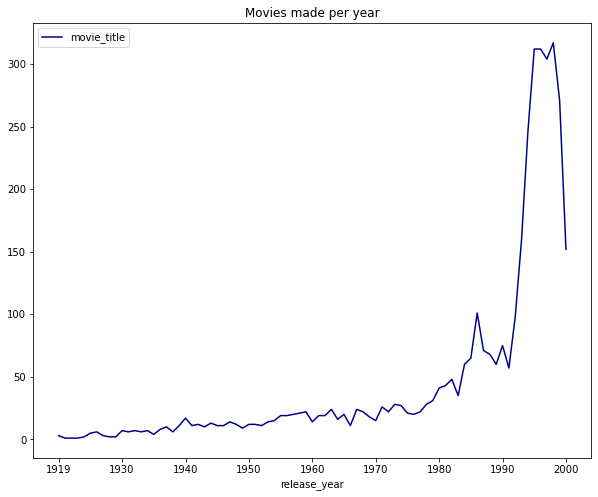

In [198]:
#  Plot data, line chart for showing development over the years
y_m.plot.line(title = 'Movies made per year',color='DarkBlue',figsize=(10, 8));

In [199]:
from pandas import Series, DataFrame

In [200]:
# Split genres and create a new entry for each of the genre a movie falls into
s =Master_data_frame.Genres.str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
del Master_data_frame['Genres']
Master_data_frame = Master_data_frame.join(s)

In [201]:
Master_data_frame.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,movie_title,release_year,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,1975,Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach,1996,Animation
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach,1996,Children's
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach,1996,Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady,1964,Musical


In [202]:
UserId_2696 = Master_data_frame[(Master_data.UserID == 2696)]
# UserId_2696=moviemat[['movie_title','release_year','MovieID','Genres']]
UserId_2696

<ipython-input-202-5b30f0ef6d07>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UserId_2696 = Master_data_frame[(Master_data.UserID == 2696)]


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,movie_title,release_year,Genres
953847,2696,1270,2,973308676,M,25,7,24210,Back to the Future,1985,Comedy
953847,2696,1270,2,973308676,M,25,7,24210,Back to the Future,1985,Sci-Fi
953848,2696,1097,3,973308690,M,25,7,24210,E.T. the Extra-Terrestrial,1982,Children's
953848,2696,1097,3,973308690,M,25,7,24210,E.T. the Extra-Terrestrial,1982,Drama
953848,2696,1097,3,973308690,M,25,7,24210,E.T. the Extra-Terrestrial,1982,Fantasy
953848,2696,1097,3,973308690,M,25,7,24210,E.T. the Extra-Terrestrial,1982,Sci-Fi
953849,2696,1617,4,973308842,M,25,7,24210,L.A. Confidential,1997,Crime
953849,2696,1617,4,973308842,M,25,7,24210,L.A. Confidential,1997,Film-Noir
953849,2696,1617,4,973308842,M,25,7,24210,L.A. Confidential,1997,Mystery
953849,2696,1617,4,973308842,M,25,7,24210,L.A. Confidential,1997,Thriller


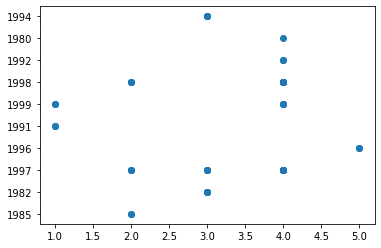

In [203]:
plt.scatter(y=UserId_2696.release_year, x=UserId_2696.Rating);

In [204]:
# How many different genres do we have?
Master_data_frame['Genres'].unique()

array(['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller',
       'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir',
       'Documentary'], dtype=object)

In [205]:
len(Master_data_frame['Genres'].unique())

18

In [206]:
# Group movies by genre using title as unique identifier and display all genres.
md_genre = (pd.DataFrame(Master_data_frame.groupby('Genres').movie_title.nunique())).sort_values('movie_title', ascending=True)
md_genre.head(20)

,movie_title
Genres,
Film-Noir,44
Western,67
Fantasy,68
Mystery,103
Animation,105
Documentary,110
Musical,113
War,141
Crime,200


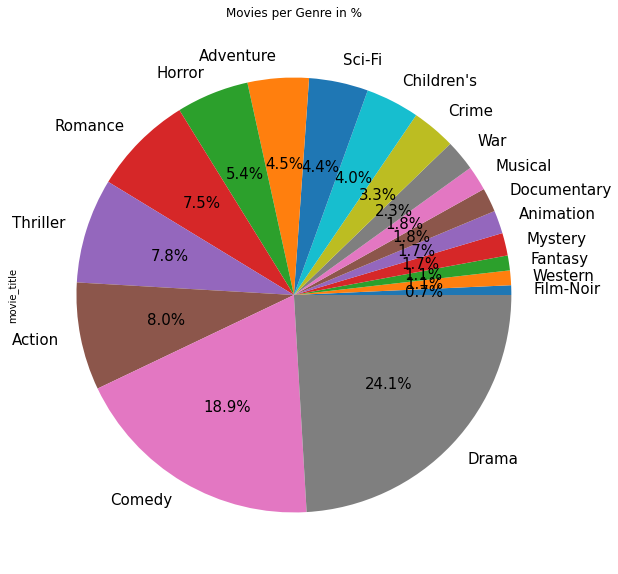

In [207]:
md_genre['movie_title'].plot.pie(title= 'Movies per Genre in %', figsize=(10,10), autopct='%1.1f%%',fontsize=15);

<AxesSubplot:title={'center':'Movies per Genre'}, ylabel='Genres'>

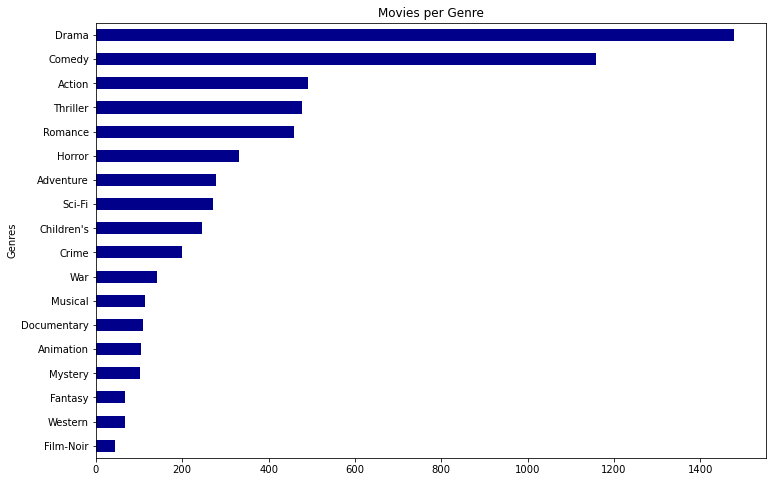

In [208]:
# Display in bar chart
md_genre['movie_title'].plot.barh(title = 'Movies per Genre',color='DarkBlue', figsize=(12, 8))

In [209]:
genre_df=Master_data_frame[['Genres','movie_title']]

In [210]:
# Use a temporary column with values one, pivot and fill nan with 0
new = genre_df.assign(val=1).pivot_table(columns='movie_title',index=['Genres'],values='val',fill_value=0).reset_index()

In [211]:
new

movie_title,Genres,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin,Zeus and Roxanne,eXistenZ
0,Action,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,Adventure,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Animation,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Children's,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Comedy,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
5,Crime,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
6,Documentary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Drama,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
8,Fantasy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Film-Noir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [213]:
Master_feature=Master_data_frame[Master_data_frame.columns[~Master_data_frame.columns.isin(['UserID','MovieID','Zip-code','Timestamp','movie_title'])]]


In [214]:
Master_feature.head()

,Rating,Gender,Age,Occupation,release_year,Genres
0,5,F,1,10,1975,Drama
1,3,F,1,10,1996,Animation
1,3,F,1,10,1996,Children's
1,3,F,1,10,1996,Musical
2,3,F,1,10,1964,Musical


In [215]:
Master_feature.Gender = number.fit_transform(Master_feature["Gender"].astype("str"))
Master_feature.Genres = number.fit_transform(Master_feature["Genres"].astype("str"))

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [216]:
Master_feature

,Rating,Gender,Age,Occupation,release_year,Genres
0,5,0,1,10,1975,7
1,3,0,1,10,1996,2
1,3,0,1,10,1996,3
1,3,0,1,10,1996,11
2,3,0,1,10,1964,11
...,...,...,...,...,...,...
1000207,2,1,45,5,1984,0
1000207,2,1,45,5,1984,16
1000208,2,1,45,5,1980,1
1000208,2,1,45,5,1980,7


In [217]:
Master_feature.dtypes

Rating           int64
Gender           int32
Age              int64
Occupation       int64
release_year    object
Genres           int32
dtype: object

In [218]:
Master_feature['release_year']=Master_feature['release_year'].astype(str).astype(int)

<ipython-input-218-6ca14f6ca648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Master_feature['release_year']=Master_feature['release_year'].astype(str).astype(int)


In [219]:
Master_feature[Master_feature.columns[0:]].corr()['Rating'][:]

Rating          1.000000
Gender         -0.019593
Age             0.056916
Occupation      0.008874
release_year   -0.163050
Genres          0.028662
Name: Rating, dtype: float64

In [220]:
X_feature = Master_feature

In [221]:
X_feature

,Rating,Gender,Age,Occupation,release_year,Genres
0,5,0,1,10,1975,7
1,3,0,1,10,1996,2
1,3,0,1,10,1996,3
1,3,0,1,10,1996,11
2,3,0,1,10,1964,11
...,...,...,...,...,...,...
1000207,2,1,45,5,1984,0
1000207,2,1,45,5,1984,16
1000208,2,1,45,5,1980,1
1000208,2,1,45,5,1980,7


In [222]:
X_feature_small = X_feature[:5000]

In [223]:
X_feature_small

,Rating,Gender,Age,Occupation,release_year,Genres
0,5,0,1,10,1975,7
1,3,0,1,10,1996,2
1,3,0,1,10,1996,3
1,3,0,1,10,1996,11
2,3,0,1,10,1964,11
...,...,...,...,...,...,...
2227,4,1,45,17,1951,0
2227,4,1,45,17,1951,1
2227,4,1,45,17,1951,13
2227,4,1,45,17,1951,16


In [224]:
X_feature_small_trimmed = X_feature_small.drop(['Rating'], axis=1)


In [225]:
X_feature_small_trimmed.head()

,Gender,Age,Occupation,release_year,Genres
0,0,1,10,1975,7
1,0,1,10,1996,2
1,0,1,10,1996,3
1,0,1,10,1996,11
2,0,1,10,1964,11


In [226]:
Y_target = Master_feature['Rating'][:5000]

In [227]:
x_train, x_test, y_train, y_test = train_test_split(X_feature_small_trimmed,Y_target,random_state=1)

In [228]:
from sklearn.linear_model import LogisticRegression

Logistic regression is best used for predicting categorical data

need to do logistic regression on the training data so we can see how well our test data does the prediction

The dataset kept throwing off a non-convergence error where max iterations had been reached. I used the code below to increase the max iter.



In [229]:
logreg = LogisticRegression(max_iter=100000)

In [230]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

Let's predict the outcome based on test set

In [231]:
y_pred = logreg.predict(x_test)

let's get the accuracy score of the test data

In [232]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.3704

In [233]:
# print the first 30 true and predicted responses
print ('actual:    ', y_test.values[0:30])
print ('predicted: ', y_pred[0:30])

actual:     [4 5 3 3 5 3 2 4 5 3 5 5 5 2 3 3 4 3 4 4 5 4 1 5 3 5 5 3 5 2]
predicted:  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [234]:
#SVM

from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(x_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
accuracy

0.3704

In [235]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy

0.3976

In [236]:
#Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 

# accuracy on X_test 
accuracy = gnb.score(x_test, y_test)  

# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

accuracy

0.3552